In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import seaborn as sns

# 3FHL catalog
from http://www.ssdc.asi.it/fermi3fhl/
(you can also download it as txt file .... I just noticed that too late)

citation https://arxiv.org/abs/1702.00664

In [2]:
with fits.open("gll_psch_v13.fit") as f:
    #single out the redshift, if wanted
    #redshifts = f[1].data["Redshift"]
    
    #define some column names to be loaded from file
    # columns can be looked at with:
    # print(f[1].data.dtype.names)
    # warning: some of the columns contain arrays, which then don't play nice with the pandas table
    # but they are not in this list below
    df_cols = ['Source_Name', 'RAJ2000', 'DEJ2000', 'Redshift', 'Pivot_Energy', 'Flux_Density', 'Unc_Flux_Density', 
               'Flux', 'Unc_Flux', 'Energy_Flux', 'Unc_Energy_Flux',
               'Signif_Curve', 'SpectrumType', 'Spectral_Index', 'Unc_Spectral_Index', 'beta', 'Unc_beta', 
               'PowerLaw_Index', 'Unc_PowerLaw_Index',
               'CLASS'
              ]
    # separate catalog into data with and without redshift information
    threeFHL_rs = pd.DataFrame(columns = df_cols)
    threeFHL = pd.DataFrame(columns = df_cols)
    for d in f[1].data:
        # redshift not NaN
        if np.isfinite(d["Redshift"]): 
            # get all entries for all columns
            xdata = [d[atr] for atr in df_cols]    
            threeFHL_rs = threeFHL_rs.append(pd.Series(xdata, index=df_cols), 
                               ignore_index=True)
        else:
            xdata = [d[atr] for atr in df_cols]    
            threeFHL = threeFHL.append(pd.Series(xdata, index=df_cols), 
                               ignore_index=True)

In [5]:
# TXS 0506+056
threeFHL[threeFHL.Source_Name=="3FHL J0509.4+0542"]

,Source_Name,RAJ2000,DEJ2000,Redshift,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,CLASS
209,3FHL J0509.4+0542,77.363625,5.706592,NaN,21.446362,9.024403e-12,8.929053e-13,4.007241e-10,3.965564e-11,2.017411e-11,3.283848e-12,1.206573,PowerLaw,2.16159,0.211574,0.161166,0.144337,2.333805,0.133023,bll


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2C60048D0>]],
      dtype=object)

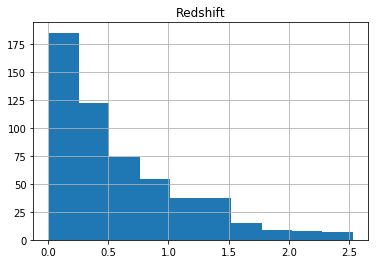

In [6]:
threeFHL_rs.hist("Redshift")

# swift-BOB catalog 
from https://swift.gsfc.nasa.gov/results/bs105mon/



In [7]:
bat = pd.read_csv("BAT_105m_catalog_07jul2019.txt", sep="|", skipinitialspace=True, comment="#") # it has a nasty style of separation

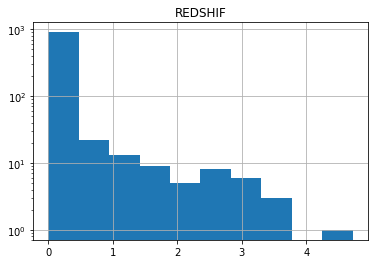

In [8]:
ax = bat.hist("REDSHIF") # REDSHIF   .... T .... :D
ax[0][0].set_yscale("log")

# Star Bob Galaxies  
downloaded from https://iopscience.iop.org/article/10.1088/0004-637X/755/2/164#apj435974t1

citation https://arxiv.org/abs/1206.1346

used also in Auger anisotropy analysis https://arxiv.org/abs/1801.06160

In [9]:
sbg = pd.read_csv("SBG_apj435974t1_ascii.txt", skiprows=3, sep="\t", skipfooter=2, engine="python", comment="#")

Text(0.5, 0, 'Distance [Mpc]')

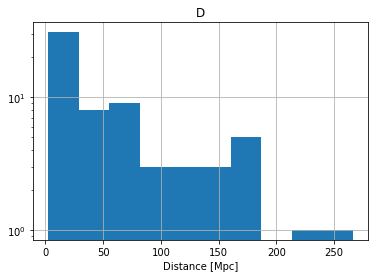

In [11]:
ax = sbg.hist("D")
ax[0][0].set_yscale("log")
ax[0][0].set_xlabel("Distance [Mpc]")

# Bob infrared Galaxy sample
downloaded from http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/AJ/126/1607

citation https://arxiv.org/abs/astro-ph/0306263

also look at http://goals.ipac.caltech.edu/  and http://wise2.ipac.caltech.edu/docs/release/allsky/#src_cat ??

In [12]:
bigs = pd.read_csv("bright_infrared_galaxies.tsv", comment="#", sep="\t") 
# there is also a lot of information in the file as a comment, such as units in line below column name

In [13]:
bigs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 48 columns):
_RAJ2000    629 non-null float64
_DEJ2000    629 non-null float64
Name        629 non-null object
n_Name      629 non-null object
f_Name      629 non-null object
IRAS        629 non-null object
f_IRAS      629 non-null object
RAJ2000     629 non-null object
DEJ2000     629 non-null object
GLON        629 non-null float64
GLAT        629 non-null float64
HR          629 non-null object
l_F12um     629 non-null object
F12um       629 non-null float64
u_F12um     629 non-null object
e_F12um     629 non-null object
S12um       629 non-null object
M12um       629 non-null object
C12um       629 non-null object
F25um       629 non-null float64
u_F25um     629 non-null object
e_F25um     629 non-null object
S25um       629 non-null object
M25um       629 non-null object
C25um       629 non-null object
F60um       629 non-null float64
u_F60um     629 non-null object
e_F60um     629 non-null

Text(0.5, 0, 'log(60 micron band flux density)')

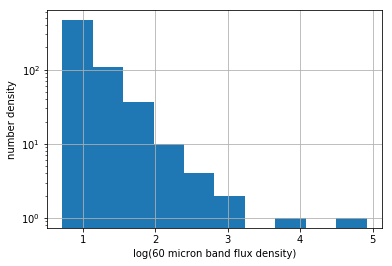

In [41]:
ax = np.log10(bigs.F60um).hist()
ax.set_yscale("log")
ax.set_ylabel("number density")
ax.set_xlabel("log(60 micron band flux density)")

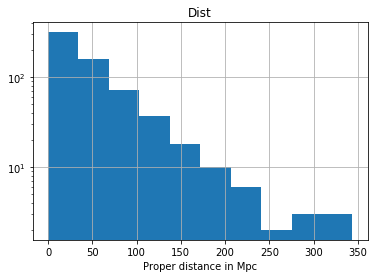

In [18]:
ax = bigs.hist("Dist")[0][0]
ax.set_xlabel("Proper distance in Mpc")
ax.set_yscale("log")

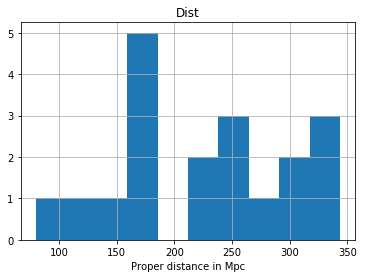

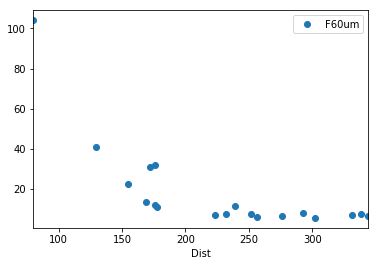

In [45]:
# select 20 brightest objects
ax = bigs[bigs.Rank<20].hist("Dist")[0][0]
ax.set_xlabel("Proper distance in Mpc")
bigs[bigs.Rank<20].plot("Dist", "F60um", lw=0, marker="o")